In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import spacy
import re

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
df = pd.read_csv('CLEANDATA/Clean_MT.csv', index_col=False)
df.head(10)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
5,Morbid obesity. Laparoscopic antecolic anteg...,Bariatrics,Laparoscopic Gastric Bypass,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST...","bariatrics, gastric bypass, eea anastomosis, r..."
6,"Liposuction of the supraumbilical abdomen, re...",Bariatrics,Liposuction,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b...","bariatrics, breast reconstruction, excess, lma..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
8,Suction-assisted lipectomy - lipodystrophy of...,Bariatrics,Lipectomy - Abdomen/Thighs,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...","bariatrics, lipodystrophy, abd pads, suction-a..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."


In [5]:
df['description'].iloc[6]

' Liposuction of the supraumbilical abdomen, revision of right breast reconstruction, excision of soft tissue fullness of the lateral abdomen and flank.\r\n'

' Liposuction of the supraumbilical abdomen, revision of right breast reconstruction, excision of soft tissue fullness of the lateral abdomen and flank.\r\n'

In [6]:
df['medical_specialty'].iloc[6]

' Bariatrics'

In [7]:
df['sample_name'].iloc[6]

' Liposuction '

In [8]:
df['transcription'].iloc[6]

'PREOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,POSTOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,PROCEDURES:,1.  Revision, right breast reconstruction.,2.  Excision, soft tissue fullness of the lateral abdomen and flank.,3.  Liposuction of the supraumbilical abdomen.,ANESTHESIA: , General.,INDICATION FOR OPERATION:,  The patient is a 31-year-old white female who previously has undergone latissimus dorsi flap and implant, breast reconstruction.  She now had lateralization of the implant with loss of medial fullness for which she desired correction.  It was felt that mobilization of the implant medially would provide the patient significant improvement and this was discussed with the patient at length.  The patient also had a small dog ear in the flank area on the right from the

'PREOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,POSTOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,PROCEDURES:,1.  Revision, right breast reconstruction.,2.  Excision, soft tissue fullness of the lateral abdomen and flank.,3.  Liposuction of the supraumbilical abdomen.,ANESTHESIA: , General.,INDICATION FOR OPERATION:,  The patient is a 31-year-old white female who previously has undergone latissimus dorsi flap and implant, breast reconstruction.  She now had lateralization of the implant with loss of medial fullness for which she desired correction.  It was felt that mobilization of the implant medially would provide the patient significant improvement and this was discussed with the patient at length.  The patient also had a small dog ear in the flank area on the right from the latissimus flap harvest, which was to be corrected.  She had also had liposuction of the periumbilical and infraumbilical abdomen with desire to have great improvement superiorly, was felt to be a candidate for such.  The above-noted procedure was discussed with the patient in detail.  The risks, benefits and potential complications were discussed.  She was marked in the upright position and then taken to the operating room for the above-noted procedure.,OPERATIVE PROCEDURE: , The patient was taken to the operating room and placed in the supine position.  Following adequate induction of general LMA anesthesia, the chest and abdomen was prepped and draped in the usual sterile fashion.  The supraumbilical abdomen was then injected with a solution of 5% lidocaine with epinephrine, as was the dog ear.  At this time, the superior central scar was then excised, dissection continued through the subcutaneous tissue, the underlying latissimus muscle until the capsule of the implant was reached.  This was then opened.  The implant was removed and placed on the back table in antibiotic solution.  Using Bovie cautery, the medial capsule was released and undermining was then performed with release of the muscle to the level of the proposed medial projection of the breast.  The inframammary fold medially was secured with 2-0 PDS suture to create greater takeoff point at this level which in the upright position and using a sizer produced a good form.  The lateral pocket was diminished by series of 2-0 PDS suture to provide medialization of the implant.  The implant was then placed back into the submuscular pocket with much improved positioning and medial fullness.  With this completed, the implant was again removed, antibiotic irrigation was performed.  A drain was placed and brought out through a separate inferior stab wound incision and hemostasis was confirmed.  The implant was then replaced and the wound was then closed in layers using 2-0 PDS running suture on the muscle and 3-0 Monocryl Dermabond subcuticular sutures.  The 2.5 cm dog ear was then excised into and including the subcutaneous tissue, even contouring was achieved and this was closed with two layers using 3-0 Monocryl suture.  Using a #3 cannula, a superior umbilical incision, liposuction was carried out into the supraumbilical abdomen, removing approximately 40 to 50 mL of fat with improved supraumbilical contours.  This was closed with 6-0 Prolene suture.  The patient was placed in a compressive garment after treating the incision with Dermabond, Steri-Strips and antibiotic ointment around the drain site and umbilicus.  A Kerlix dressing and a surgical bra was placed to the chest area.  A compressive garment was placed.  The patient was then aroused from anesthesia, extubated, and taken to the recovery room in stable condition.  Sponge, needle, lap, instrument counts were all correct.  The patient tolerated the procedure well.  There were no complications.  The estimated blood loss was approximately 25 mL.'

In [9]:
df['keywords'].iloc[6]

'bariatrics, breast reconstruction, excess, lma anesthesia, lipodystrophy, liposuction, abdomen, drain site, flank, latissimus dorsi flap, soft tissue, supraumbilical, surgical bra, supraumbilical abdomen, reconstruction, breast, tissue, implant,'

'bariatrics, breast reconstruction, excess, lma anesthesia, lipodystrophy, liposuction, abdomen, drain site, flank, latissimus dorsi flap, soft tissue, supraumbilical, surgical bra, supraumbilical abdomen, reconstruction, breast, tissue, implant,'

----------------

In [10]:
sample_text = df['transcription'].iloc[6]
sample_text

'PREOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,POSTOPERATIVE DIAGNOSES:,1.  Deformity, right breast reconstruction.,2.  Excess soft tissue, anterior abdomen and flank.,3.  Lipodystrophy of the abdomen.,PROCEDURES:,1.  Revision, right breast reconstruction.,2.  Excision, soft tissue fullness of the lateral abdomen and flank.,3.  Liposuction of the supraumbilical abdomen.,ANESTHESIA: , General.,INDICATION FOR OPERATION:,  The patient is a 31-year-old white female who previously has undergone latissimus dorsi flap and implant, breast reconstruction.  She now had lateralization of the implant with loss of medial fullness for which she desired correction.  It was felt that mobilization of the implant medially would provide the patient significant improvement and this was discussed with the patient at length.  The patient also had a small dog ear in the flank area on the right from the

In [36]:
def PreProcessText(text):
    #lowercase
    text = text.lower()
    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    doc = nlp(text)
    # Convert to lowercase, lemmatize, remove stop words and punctuation
    tokens = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])
    
    # Remove extra whitespace
    tokens = re.sub(r'\s+', ' ', tokens).strip()
    return tokens  

In [37]:
PreProcessText(sample_text)

'preoperative diagnose deformity right breast reconstruction excess soft tissue anterior abdoman flank lipodystrophy abdomenpostoperative diagnose deformity right breast reconstruction excess soft tissue anterior abdoman flank lipodystrophy abdomenprocedure revision right breast reconstruction excision soft tissue fullness lateral abdoman flank liposuction supraumbilical abdomenanesthesia generalindication operation patient yearold white female previously undergone latissimus dorsi flap implant breast reconstruction lateralization implant loss medial fullness desire correction feel mobilization implant medially provide patient significant improvement discuss patient length patient small dog ear flank area right latissimus flap harvest correct liposuction periumbilical infraumbilical abdoman desire great improvement superiorly feel candidate abovenoted procedure discuss patient detail risk benefit potential complication discuss mark upright position take operating room abovenote procedu

-----------

In [38]:
df = df[df['medical_specialty'].isin(df['medical_specialty'].value_counts()[df['medical_specialty'].value_counts() > 100].index)]

In [39]:
df['medical_specialty'].value_counts()

medical_specialty
 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: count, dtype: int64

In [40]:
# preprocess the transcription text
df['transcription_p'] = df['transcription'].apply(PreProcessText)

In [41]:
# define x and y
X = df['transcription_p']
y = df['medical_specialty']

In [43]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 2408
Testing set size: 602


---------

In [45]:
# Define the vectorizer
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.9)

In [46]:
# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix for training data: {X_train_tfidf.shape}")
print(f"TF-IDF matrix for testing data: {X_test_tfidf.shape}")

TF-IDF matrix for training data: (2408, 2321)
TF-IDF matrix for testing data: (602, 2321)


In [48]:
# Define the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print(f"Original training set size: {X_train_tfidf.shape}")
print(f"Resampled training set size: {X_train_resampled.shape}")

Original training set size: (2408, 2321)
Resampled training set size: (8855, 2321)


In [50]:
# Define the classifier
nb_classifier = MultinomialNB()

In [52]:
# Train the classifier
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Classification Report:\n{report_nb}")

Naive Bayes Accuracy: 0.45182724252491696
Naive Bayes Classification Report:
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.49      0.56      0.52        63
    Consult - History and Phy.       0.38      0.45      0.41        38
              Gastroenterology       0.47      0.67      0.55        42
              General Medicine       0.33      0.39      0.36        33
                     Neurology       0.52      0.49      0.50        35
       Obstetrics / Gynecology       0.33      0.64      0.43        22
                    Orthopedic       0.39      0.75      0.51        52
                     Radiology       0.26      0.24      0.25        38
 SOAP / Chart / Progress Notes       0.36      0.50      0.42        32
                       Surgery       0.76      0.28      0.41       216
                       Urology       0.46      0.77      0.58        31

                      accuracy                           

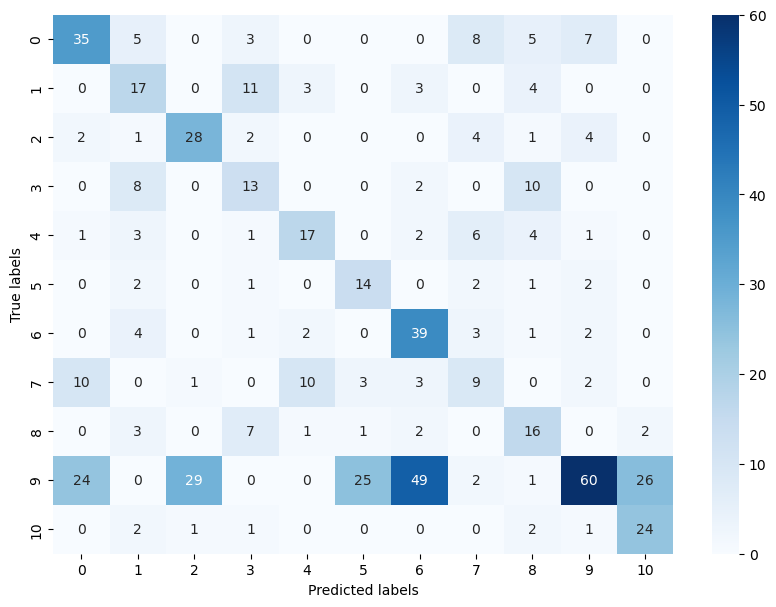

In [54]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()